<a href="https://colab.research.google.com/github/Gustavo-diaz29/EM/blob/main/EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

**cargar datos**

In [2]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archivito_modificado.csv")

VERIFICACION DE DATOS

In [3]:
datos.head()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD
0,1,2,2,2,1,2,2,2,2,2,2,2,2,1,3,2,3
1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,3
2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,1
3,2,2,2,3,2,2,2,2,2,2,2,2,2,1,2,2,3
4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3


In [4]:
datos.describe()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD
count,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06
mean,1.461199e+00,1.994111e+00,1.954271e+00,2.448580e+00,1.921059e+00,1.992551e+00,1.978249e+00,1.993767e+00,1.891677e+00,1.989313e+00,1.915126e+00,1.989762e+00,1.937172e+00,1.678221e+00,1.791499e+00,1.995244e+00,2.893824e+00
std,4.984923e-01,7.651050e-02,2.088959e-01,5.221049e-01,2.696462e-01,8.598818e-02,1.458698e-01,7.870546e-02,3.107876e-01,1.028217e-01,2.786938e-01,1.006653e-01,2.426534e-01,7.563970e-01,4.062371e-01,6.880228e-02,6.286726e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
max,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,3.000000e+00,2.000000e+00,4.000000e+00


In [5]:
datos_norm = (datos - datos.min()) / (datos.max() - datos.min())
datos_norm.head()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD
0,0.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.666667
1,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.5,1.0,0.666667
2,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.5,1.0,0.000000
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.5,1.0,0.666667
4,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.010417,0.5,1.0,0.666667


In [6]:
datos_norm.describe()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD
count,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06,5.720952e+06
mean,4.611991e-01,9.941115e-01,9.542714e-01,7.242902e-01,9.210593e-01,9.925505e-01,9.782489e-01,9.937666e-01,8.916773e-01,9.893135e-01,9.151262e-01,9.897617e-01,9.371720e-01,7.064804e-03,3.957496e-01,9.952436e-01,6.312747e-01
std,4.984923e-01,7.651050e-02,2.088959e-01,2.610524e-01,2.696462e-01,8.598818e-02,1.458698e-01,7.870546e-02,3.107876e-01,1.028217e-01,2.786938e-01,1.006653e-01,2.426534e-01,7.879136e-03,2.031186e-01,6.880228e-02,2.095575e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,6.666667e-01
50%,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.041667e-02,5.000000e-01,1.000000e+00,6.666667e-01
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.041667e-02,5.000000e-01,1.000000e+00,6.666667e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos)

# VALORES DE K A PROBAR

In [8]:
valores_k = [3, 5, 7, 9, 11]

## Lista para almacenar los valores de la log-verosimilitud(grafica del codo)

In [33]:
log_verosimilitudes = []

# Iterar sobre los valores de k y ajustar el modelo EM

In [13]:

resultados = []
datos_por_cluster = []

for k in tqdm(valores_k, desc="Ajustando modelos EM"):
    # Crear el modelo EM
    modelo_em = GaussianMixture(n_components=k,random_state=23, max_iter=500)
    modelo_em.fit(X_scaled)

    # Calcular la log-verosimilitud
    log_verosimilitud = modelo_em.score(X_scaled)
    log_verosimilitudes.append(log_verosimilitud)


Ajustando modelos EM: 100%|██████████| 5/5 [14:00<00:00, 168.18s/it]


# Graficar el método del codo

ValueError: x and y must have same first dimension, but have shapes (10,) and (6,)

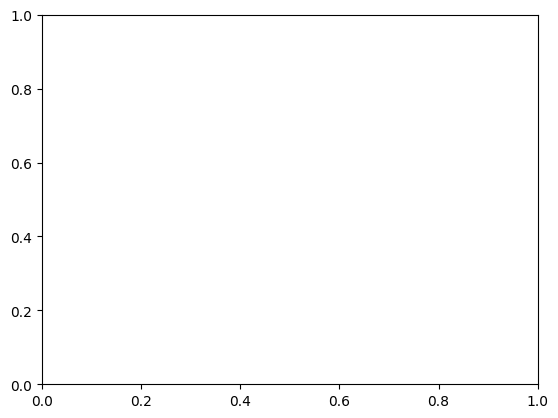

In [14]:
plt.plot(range(1,11), log_verosimilitudes)
plt.xlabel("Número de componentes (k)")
plt.ylabel("Log-verosimilitud")
plt.title("Método del codo para EM")
plt.show()

In [34]:
log_verosimilitudes2 = []

In [16]:

for k in tqdm(valores_k, desc="Ajustando modelos EM"):
    # Crear el modelo EM
    modelo_em = GaussianMixture(n_components=k)
    modelo_em.fit(datos_norm)

    # Calcular la log-verosimilitud
    log_verosimilitud2 = modelo_em.score(datos_norm)
    log_verosimilitudes2.append(log_verosimilitud2)

        # Obtener las etiquetas de los clusters
    labels = modelo_em.predict(X_scaled)

    # Calcular índices de validación
    davies_bouldin = davies_bouldin_score(datos_norm, labels)
    calinski_harabasz = calinski_harabasz_score(datos_norm, labels)

        # Crear un DataFrame con los resultados
    resultado = pd.DataFrame({'K': [k], 'Davies-Bouldin': [davies_bouldin], 'Calinski_Harabasz': [calinski_harabasz]})
    resultados.append(resultado)
    # Agregar las etiquetas de cluster al DataFrame de datos
    datos_con_cluster = datos_norm.copy()
    datos_con_cluster['cluster'] = labels
    datos_por_cluster.append(datos_con_cluster)

Ajustando modelos EM:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
Ajustando modelos EM:  20%|██        | 1/5 [01:12<04:51, 72.98s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
Ajustando modelos EM:  40%|████      | 2/5 [04:11<06:45, 135.28s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
Ajustando modelos EM:  60%|██████    | 3/5 [08:17<06:10, 185.45s/it]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
Ajustando modelos EM:  80%

In [22]:
resultados = pd.concat([resultados], ignore_index=True)
# Guardar los resultados en un archivo CSV
resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/Em/Resultados/resultados_indicesEM.csv', index=False)

# Guardar los datos de cada cluster en archivos CSV separados
for i, cluster_data in enumerate(datos_por_cluster):
    cluster_data.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Em/Archivito por Valor/clusterEM_{i+1}.csv', index=False)

# Indices Internos

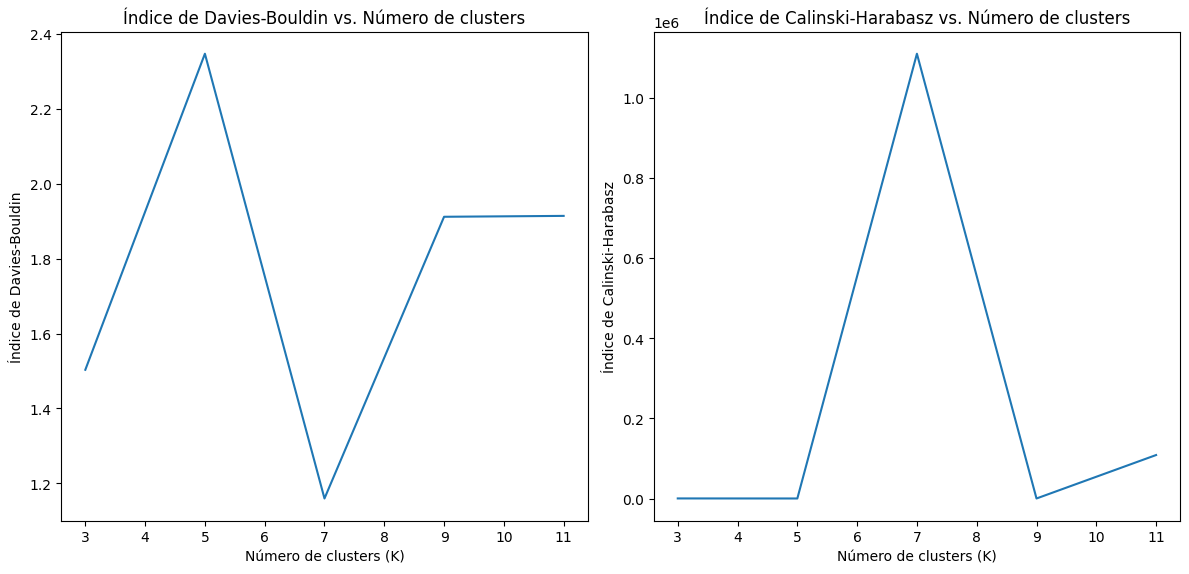

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(resultados['K'], resultados['Davies-Bouldin'])
plt.xlabel('Número de clusters (K)')
plt.ylabel('Índice de Davies-Bouldin')
plt.title('Índice de Davies-Bouldin vs. Número de clusters')

plt.subplot(1, 2, 2)
plt.plot(resultados['K'], resultados['Calinski_Harabasz'])
plt.xlabel('Número de clusters (K)')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Índice de Calinski-Harabasz vs. Número de clusters')

plt.tight_layout()

plt.show()

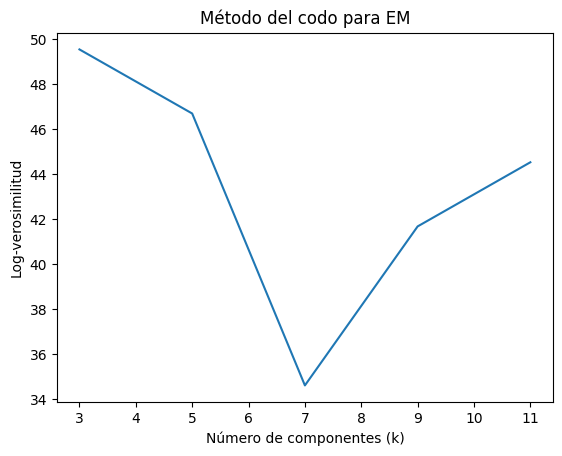

In [23]:
plt.plot(valores_k, log_verosimilitudes2)
plt.xlabel("Número de componentes (k)")
plt.ylabel("Log-verosimilitud")
plt.title("Método del codo para EM")
plt.show()

# Seleccionar el valor óptimo de k

In [24]:
modelo_final = GaussianMixture(n_components=5, random_state=0)
modelo_final.fit(datos)

GaussianMixture(n_components=5, random_state=0)

In [25]:
etiquetas = modelo_final.predict(datos)

In [26]:
datos['cluster'] = etiquetas

In [27]:
datos.head()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD,cluster
0,1,2,2,2,1,2,2,2,2,2,2,2,2,1,3,2,3,2
1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,3,4
2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,1,2
3,2,2,2,3,2,2,2,2,2,2,2,2,2,1,2,2,3,4
4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4


In [29]:
datos.to_csv("/content/drive/MyDrive/Colab Notebooks/Em/Resultados/archivito_con_clustersEM.csv", index=False)

In [30]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Em/Resultados/archivito_con_clustersEM.csv")
datos.head()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD,cluster
0,1,2,2,2,1,2,2,2,2,2,2,2,2,1,3,2,3,2
1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,3,4
2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,1,2
3,2,2,2,3,2,2,2,2,2,2,2,2,2,1,2,2,3,4
4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4


In [31]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Em/Resultados/resultados_indicesEM.csv")
datos.head()

,K,Davies-Bouldin,Calinski_Harabasz
0,3,1.503397,2.728324e+02
1,5,2.347611,1.422996e+02
2,7,1.159636,1.110213e+06
3,9,1.912128,1.421781e+02
4,11,1.914482,1.085730e+05


In [35]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Em/Archivito por Valor/clusterEM_1.csv")
datos.head()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,RESULTADO_ANTIGENO,UCI,EDAD,cluster
0,0.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.666667,2
1,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.5,1.0,0.666667,2
2,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.5,1.0,0.000000,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.5,1.0,0.666667,2
4,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.010417,0.5,1.0,0.666667,2
